In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../Resources/Mouse_metadata.csv"
study_results_path = "../Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
mouse_data_combined = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
# Display the data table for preview
mouse_data_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
 # Checking the number of mice.
mouse = mouse_data_combined.value_counts("Mouse ID")
number_mice = len(mouse)
number_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse = mouse_data_combined.loc[mouse_data_combined.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = pd.DataFrame(duplicate_mouse)
duplicate_mouse_df

,0
0,g989


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_data_combined[mouse_data_combined["Mouse ID"].isin(duplicate_mouse)==False]
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame
clean_mouse = clean_mouse_df.value_counts("Mouse ID")
clean_mouse_number = len(clean_mouse)
clean_mouse_number

248

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_drug_regimen = clean_mouse_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median_drug_regimen = clean_mouse_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance_drug_regimen = clean_mouse_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std_drug_regimen = clean_mouse_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem_drug_regimen = clean_mouse_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

In [9]:
# Assemble the resulting series into a single summary dataframe.
regimen_stats_df = pd.DataFrame({"Mean": mean_drug_regimen, "Median": median_drug_regimen, "Variance": variance_drug_regimen, "Standard Deviation": std_drug_regimen, "SEM": sem_drug_regimen})
regimen_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Using the aggregation method, produce the same summary statistics in a single line
mouse_group = clean_mouse_df.groupby("Drug Regimen")
regimen_agg_df = mouse_group.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
regimen_agg_df

C:\Users\dillo\AppData\Local\Temp\ipykernel_6004\854805607.py:3: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  regimen_agg_df = mouse_group.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


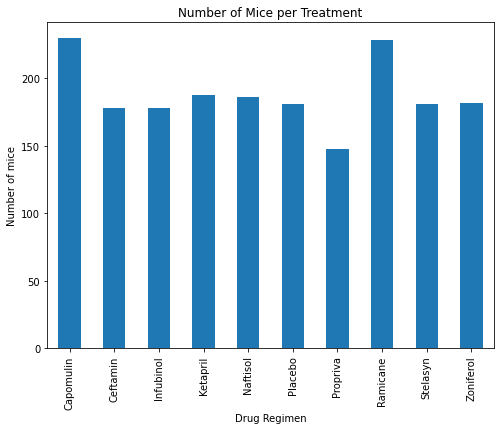

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_data = clean_mouse_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
bar1 = timepoint_data.plot(kind='bar', figsize=(8,6), title="Number of Mice per Treatment", xlabel="Drug Regimen", ylabel="Number of mice")

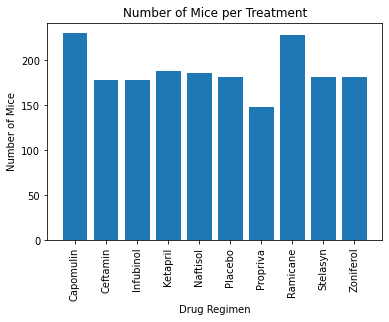

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(timepoint_data))
plt.bar(x_axis, timepoint_data,)
labels = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels, rotation='vertical')
plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

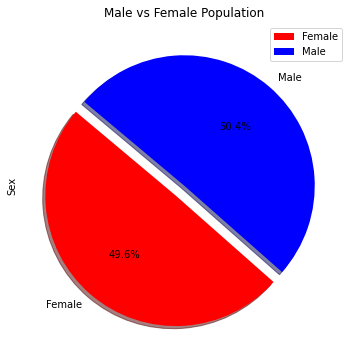

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
groupby_gender = clean_mouse_df.groupby(["Mouse ID","Sex"])
gender_df = pd.DataFrame(groupby_gender.size())
total_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
total_gender.columns = ["Total"]
total_gender["Percentage"] = ((total_gender["Total"]/total_gender["Total"].sum())*100)

colors = ["red", "blue"]
explode = (.1, 0)
total_gender.plot.pie(y="Total", figsize=(8,6), colors=colors, explode=explode, shadow=True, autopct="%1.1f%%", title="Male vs Female Population", startangle=140, ylabel="Sex")
plt.show()

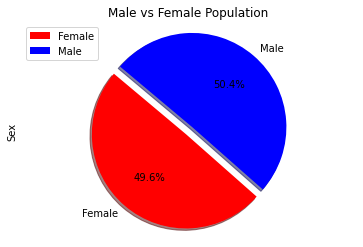

In [14]:
 # Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
colors = ["red", "blue"]
total = [49.596774, 50.403226]
explode = (0.1, 0)
plt.pie(total, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Male vs Female Population")
plt.ylabel("Sex")
plt.axis("equal")
plt.legend(loc="best")
plt.show()

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = mouse_data_combined.loc[mouse_data_combined["Drug Regimen"] == "Capomulin",:]
Ramicane_df = mouse_data_combined.loc[mouse_data_combined["Drug Regimen"] == "Ramicane", :]
Infubinol_df = mouse_data_combined.loc[mouse_data_combined["Drug Regimen"] == "Infubinol",:]
Ceftamin_df = mouse_data_combined.loc[mouse_data_combined["Drug Regimen"] == "Ceftamin",:]

In [16]:
# Start by getting the last (greatest) timepoint for each mouse
Capomulin_greatest = Capomulin_df.groupby("Mouse ID").max()["Timepoint"]
Ramicane_greatest = Ramicane_df.groupby("Mouse ID").max()["Timepoint"]
Infubinol_greatest = Infubinol_df.groupby("Mouse ID").max()["Timepoint"]
Ceftamin_greatest = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"]

In [30]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capo_greatest_df = pd.DataFrame(Capomulin_greatest)
Rami_greatest_df = pd.DataFrame(Ramicane_greatest)
Inf_greatest_df = pd.DataFrame(Infubinol_greatest)
Cef_greatest_df = pd.DataFrame(Ceftamin_greatest)
drug_greatest_df = pd.merge(pd.merge(pd.merge(Capo_greatest_df, Rami_greatest_df, on=("Mouse ID","Timepoint"), how="outer"), Inf_greatest_df, on=("Mouse ID","Timepoint"), how="outer"),Cef_greatest_df, on=("Mouse ID","Timepoint"), how="outer")
full_drug_merge = pd.merge(drug_greatest_df, mouse_data_combined, on=("Mouse ID", "Timepoint"), how="left")
full_drug_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
95,x226,0,Ceftamin,Male,23,28,45.000000,0
96,x581,45,Ceftamin,Female,19,28,64.634949,3
97,x822,45,Ceftamin,Male,3,29,61.386660,3
98,y769,45,Ceftamin,Female,6,27,68.594745,4


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds